# RC回路

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rhs = lambda t, x: 1 - x   # 関数 rhs(t,x) = 1-x を定義
def Euler(rhs, t, x0, args=()): 
    # tは計算する時刻の配列, x0は初期値x(t=0)
    # 関数の引数指定ができるようargs=()としておく(第2章参照)
    ans = [x0]
    for i in range(len(t)-1):
        x1 = x0 + (t[i+1] - t[i]) * rhs(t[i], x0, *args)
        ans.append(x1)
        x0 = x1
    return np.array(ans) # 戻り値は各時刻の$x(t_i)$が格納された配列

In [4]:
def RK2(rhs, t, x0, args=()):
    ans = [x0]
    for i in range(len(t)-1):
        h = t[i+1]-t[i]
        p1 = x0 + 0.5 * h * rhs(t[i], x0, *args)
        x1 = x0 + h * rhs(t[i] + 0.5 * h, p1, *args)
        ans.append(x1)
        x0 = x1
    return np.array(ans)

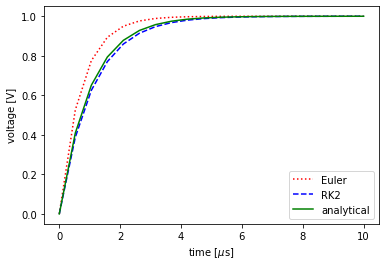

In [5]:
t = np.linspace(0, 10, 20)
I = 1-np.exp(-t)
y_Euler, y_RK2 = Euler(rhs, t, 0), RK2(rhs, t, 0)
plt.xlabel("time [$\mu$s]")
plt.ylabel("voltage [V]")
plt.plot(t, y_Euler, c='red', ls=":", label='Euler')
plt.plot(t, y_RK2, c='blue', ls="--", label='RK2')
plt.plot(t, I, c='green', ls="-", label='analytical')
# colorはc, linestyleはlsと省略することができる
plt.legend()
plt.show()

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/PythonText_Figures


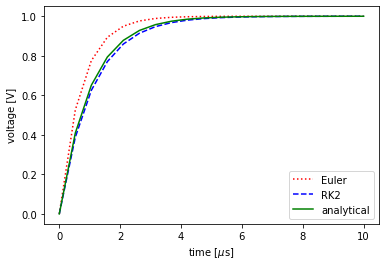

In [ ]:
# 図の保存用(テキストには含まれない)
plt.xlabel("time [$\mu$s]")
plt.ylabel("voltage [V]")
plt.plot(t, y_Euler, c='red', ls=":", label='Euler')
plt.plot(t, y_RK2, c='blue', ls="--", label='RK2')
plt.plot(t, I, c='green', ls="-", label='analytical')
plt.legend()

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/PythonText_Figures
plt.savefig("figure_ode_1.pdf", bbox_inches='tight')

# 放射性物質の崩壊

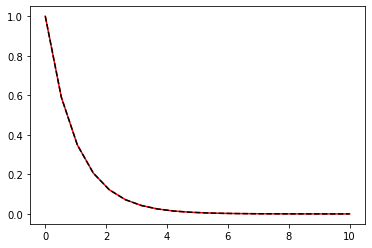

In [ ]:
from scipy.integrate import solve_ivp
rhs = lambda t, x: - x  # 前と同様に、tも指定しておく
x0, t = [1], np.linspace(0, 10, 20)
sol = solve_ivp(fun=rhs, t_span=[0,10], y0=x0, t_eval=t)
 # fun:右辺の関数, t_span:開始,終時刻, y0:初期値, t_eval:出力時刻
 # 戻り値はクラスで, 例えばsol.success=Trueなら正常終了
 # sol.y:t_evalでの値の配列, sol.nfev:関数が評価された回数など
I = np.exp(-t)
plt.plot(t, sol.y[0], c='red')
plt.plot(t, I, c='black', ls="dashed")
plt.show()

# RLC回路

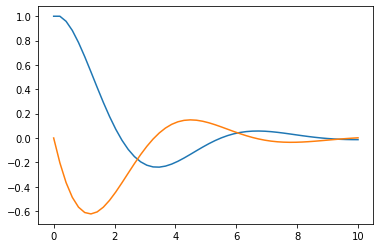

In [ ]:
rhs = lambda t, x: np.array([x[1], -x[0]-x[1]])
x0, t = np.array([1,0]), np.linspace(0, 10, 50)
y = Euler(rhs, t, x0)
plt.plot(t, y)   # 複数のデータをまとめて描くこともできる。

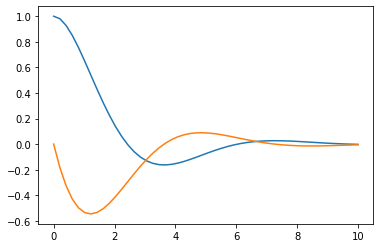

In [ ]:
sol = solve_ivp(fun=rhs, t_span=(0,10), y0=x0, t_eval=t)
plt.plot(sol.t, sol.y.T)

# 化学反応

In [ ]:
def rhs(t, y, k1, k2):
    ya, yb, yc = y[0], y[1], y[2]
    dya = -2 * k1 * ya**2 + 2 * k1 * yb
    dyb = k1 * ya**2 - (k1 + k2) * yb + k2 * yc
    dyc = k2 * yb - k2 * yc
    return np.array([dya, dyb, dyc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


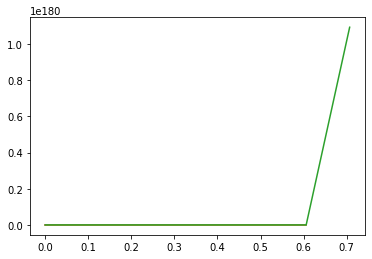

In [ ]:
x0, t = np.array([1,0,0]), np.linspace(0, 10, 100)
y = RK2(rhs, t, x0, (1, 100))
plt.plot(t, y)
plt.show()

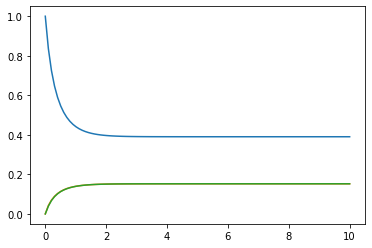

In [ ]:
sol = solve_ivp(fun=rhs, t_span=(0,10), y0=x0, \
           method="RK23", t_eval=t, args=(1,100), rtol=1e-4)
  # argsで関数rhsに渡す引数を, rtolで計算精度を指定. 
plt.plot(sol.t, sol.y.T)
plt.show()

In [ ]:
# テキストには含まれない
sol = solve_ivp(fun=rhs, t_span=(0,10), y0=x0, method="RK23", t_eval=t, args=(1,100), rtol=1e-4)
print(sol.nfev)
sol = solve_ivp(fun=rhs, t_span=(0,10), y0=x0, method="RK23", t_eval=t, args=(1,10000), rtol=1e-4)
print(sol.nfev)
sol = solve_ivp(fun=rhs, t_span=(0,10), y0=x0, method="Radau", t_eval=t, args=(1,100), rtol=1e-4)
print(sol.nfev)
sol = solve_ivp(fun=rhs, t_span=(0,10), y0=x0, method="Radau", t_eval=t, args=(1,10000), rtol=1e-4)
print(sol.nfev)

2432
238820
197
211
